# Bi variate Numerical -Numerical


In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("churn_prediction.csv")

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
numerical=data.select_dtypes(include=['int64','float64'])[:]

In [5]:
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

# correlation matrix

In [9]:
numerical.corr()
#by deafult it calaculate perason correlation

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.007750,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.007750,1.000000,0.006220,0.005192,0.007616,-0.001154,0.003512,0.000031,-0.000669,-0.002054,-0.001759,-0.004617,-0.000169,-0.004978,-0.006760,-0.000550,-0.002208,-0.004769
age,-0.000442,0.006220,1.000000,-0.000612,0.015439,-0.076532,-0.058990,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.005192,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.007616,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.001154,-0.076532,0.013134,0.006613,1.000000,0.235059,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,0.003512,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
current_balance,0.006589,0.000031,0.054346,-0.003070,-0.005654,-0.058314,0.000181,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,-0.000669,0.058342,0.000216,-0.004089,-0.059854,0.000214,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886
average_monthly_balance_prevQ,0.004485,-0.002054,0.061708,0.001213,-0.006298,-0.059535,0.001955,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.011960


In [10]:
c=numerical.corr().abs()
s=c.unstack()
so=s.sort_values(kind='quicksort',ascending=False)
so=pd.DataFrame(so,columns=['perason corr'])



In [11]:
so[so['perason corr']<1].head(20)

,,perason corr
average_monthly_balance_prevQ,previous_month_balance,0.994038
previous_month_balance,average_monthly_balance_prevQ,0.994038
current_month_balance,current_balance,0.983412
current_balance,current_month_balance,0.983412
current_month_balance,average_monthly_balance_prevQ,0.976290
average_monthly_balance_prevQ,current_month_balance,0.976290
current_month_balance,previous_month_end_balance,0.974714
previous_month_end_balance,current_month_balance,0.974714
average_monthly_balance_prevQ,previous_month_end_balance,0.970530
previous_month_end_balance,average_monthly_balance_prevQ,0.970530


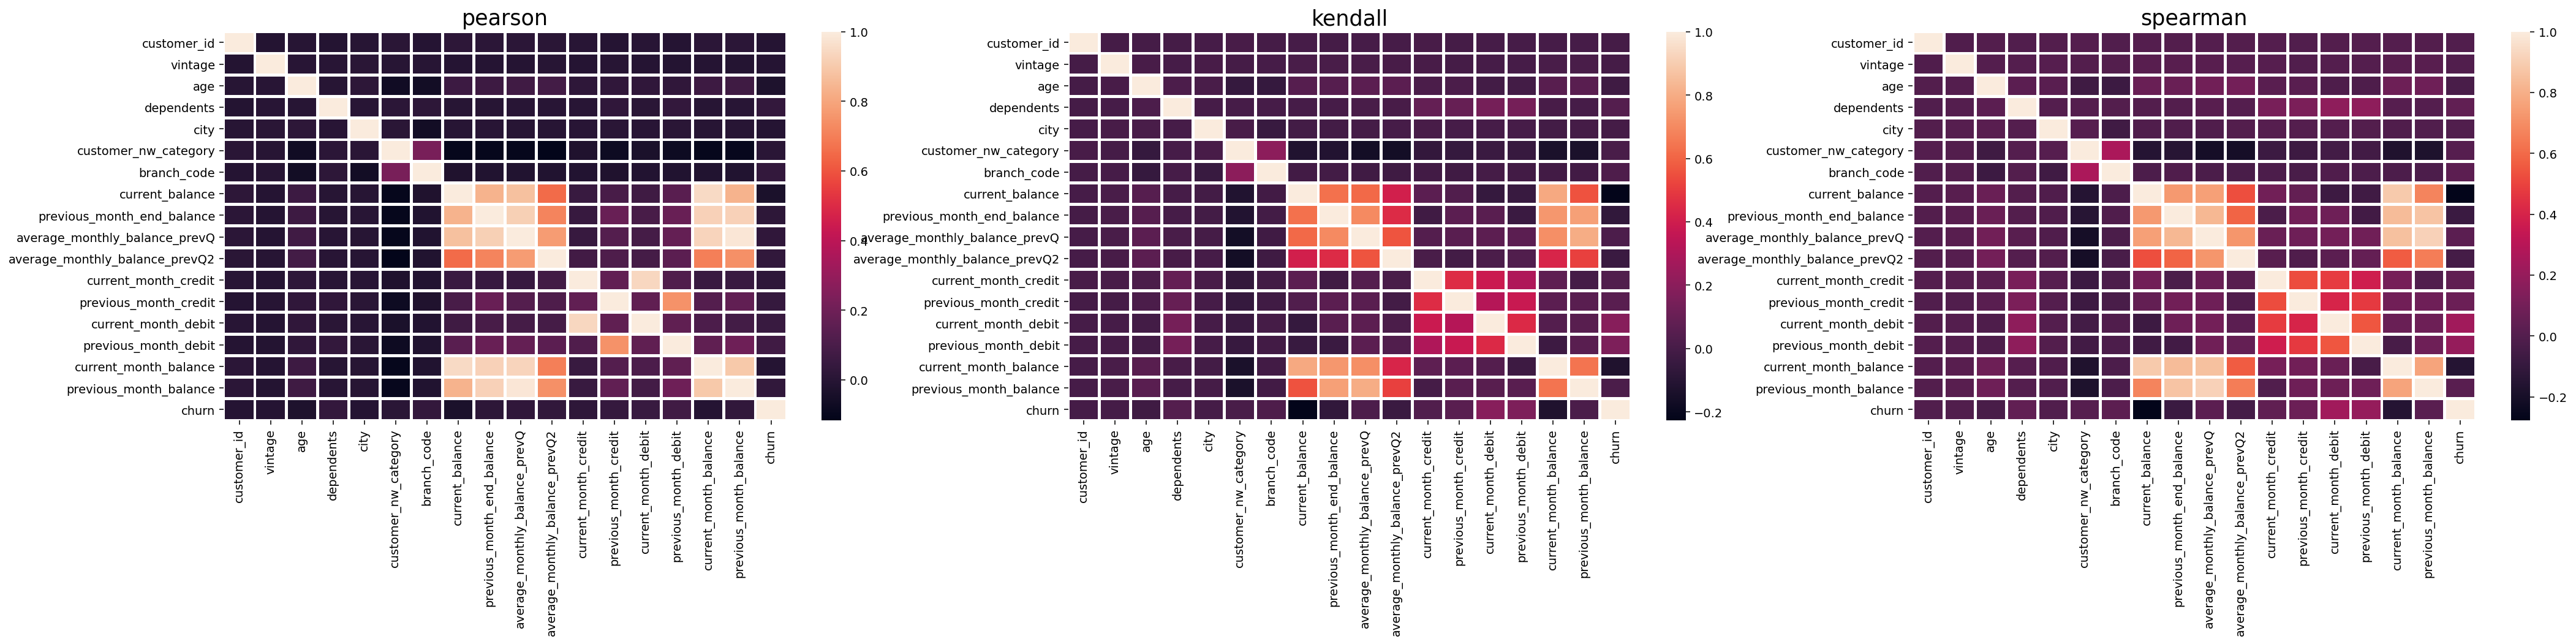

In [14]:
# plotting heatmap usill all methods for all numerical variables
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
Too many variables with insignificant correlation.
Major correlation lies between the transaction variables and balance variables.

<AxesSubplot:>

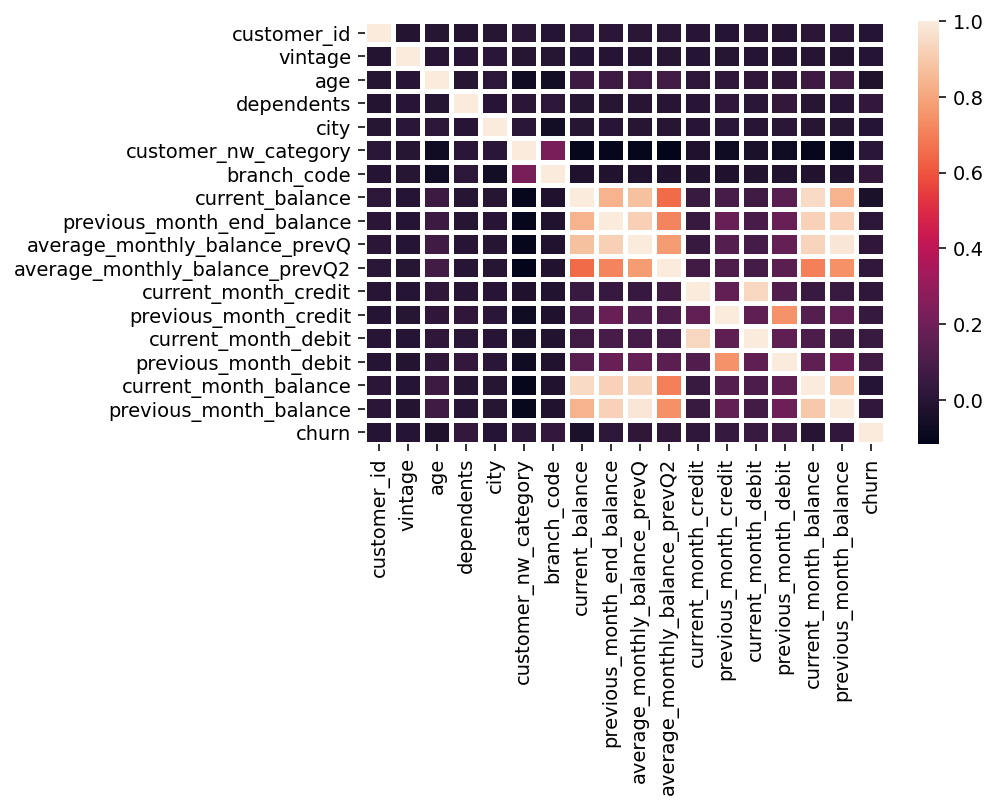

In [19]:
plt.figure(dpi=140)
correlation = numerical.dropna().corr(method='pearson')
sns.heatmap(correlation, linewidth = 2)

<AxesSubplot:>

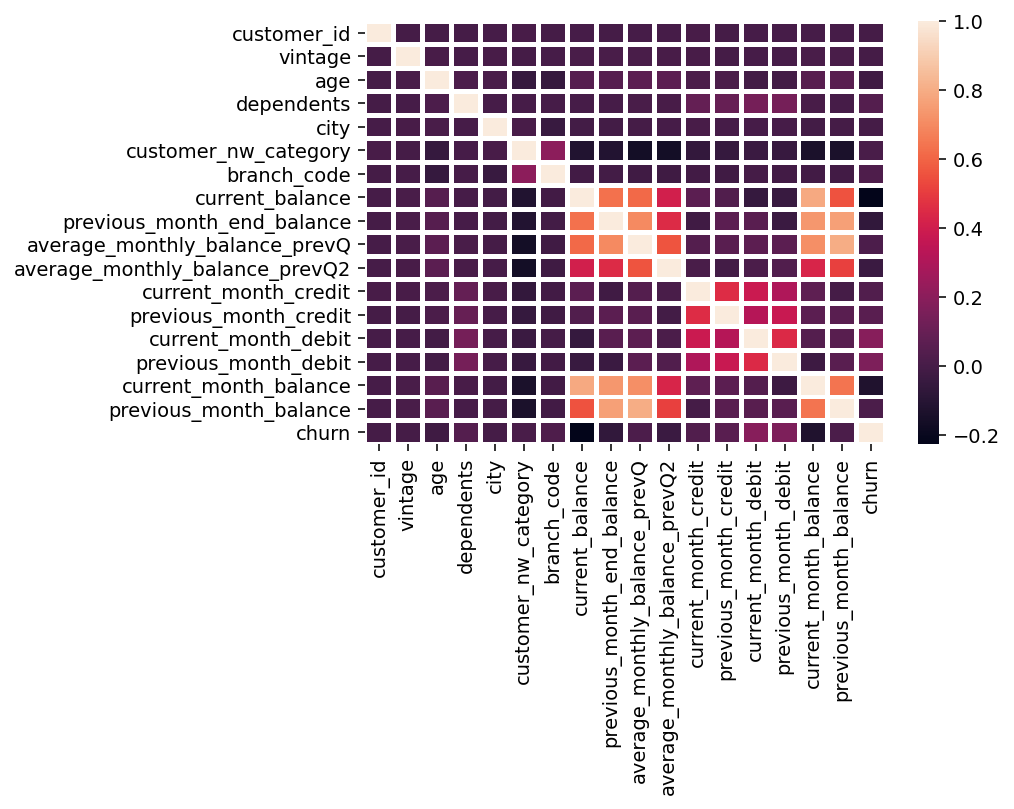

In [20]:
plt.figure(dpi=140)
correlation = numerical.dropna().corr(method='kendall')
sns.heatmap(correlation, linewidth = 2)

<AxesSubplot:>

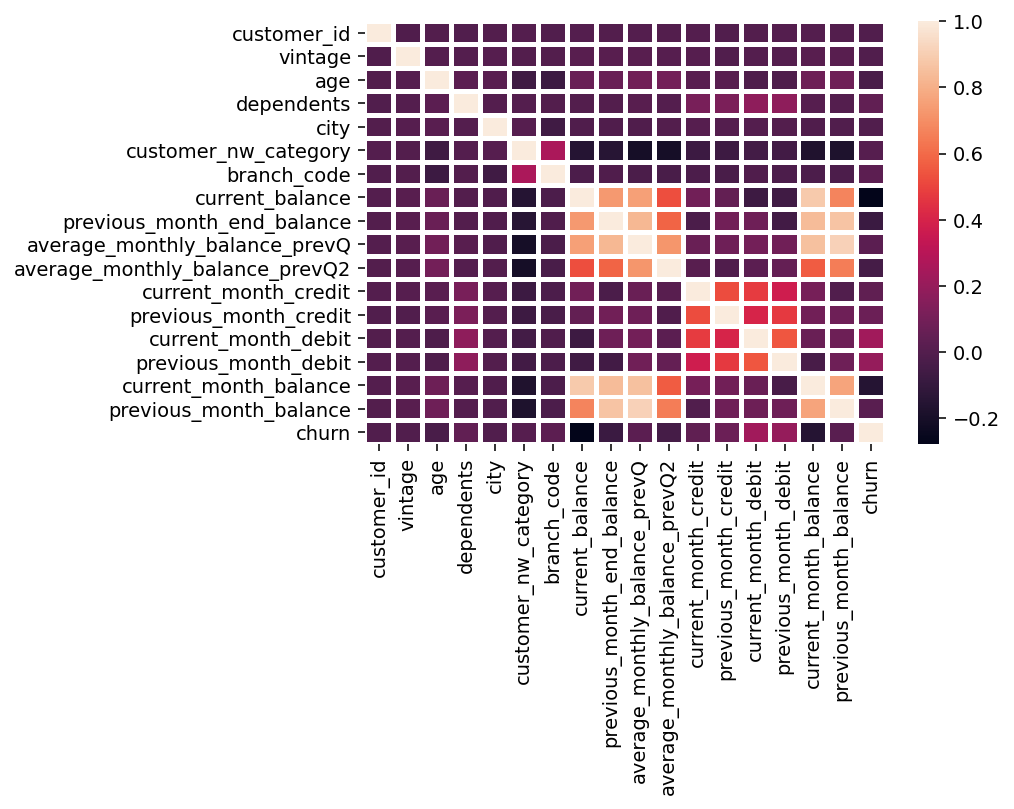

In [21]:
plt.figure(dpi=140)
correlation = numerical.dropna().corr(method='spearman')
sns.heatmap(correlation, linewidth = 2)

Inferences:

Transaction variables like credit/debit have a strong correlation among themselves.
Balance variables have strong correlation among themselves.
Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.

# Bi-variate cont-categorical


List of Hypothesis and investigation to perform under this combination.

1.  Are vintage customers less likely to churn?
2.  Are customers with higher average balance less likely to churn?
3.  Are customers dropping monthly balance highly likely to churn?